In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt

In [2]:
def prim(graph):
    n = np.shape(graph)[0]
    nearest = np.zeros(n, dtype=np.int64)
    distances = graph[0, :].copy() if graph.dtype.kind != 'u' else graph[0, :].copy().astype(np.int64)
    min_span_tree = np.zeros((n, n), dtype=graph.dtype)
    min_total_weight = 0

    for _ in range(n - 1):
        min_ = np.Inf
        v_near = -1
        for i in range(1, n):
            if 0 <= distances[i] < min_:
                min_ = distances[i]
                v_near = i
        min_span_tree[v_near, nearest[v_near]] = graph[v_near, nearest[v_near]]
        min_span_tree[nearest[v_near], v_near] = graph[nearest[v_near], v_near]
        min_total_weight += graph[nearest[v_near], v_near]

        distances[v_near] = -1
        for i in range(1, n):
            if graph[i, v_near] < distances[i]:
                distances[i] = graph[i, v_near]
                nearest[i] = v_near
    return min_span_tree, min_total_weight

In [3]:
M = np.array([[0, 1, 3, np.inf, np.inf], [1, 0, 3, 6, np.inf], [3, 3, 0, 4, 2], [np.inf, 6, 4, 0, 5], [np.inf, np.inf, 2, 5, 0]])
M

array([[ 0.,  1.,  3., inf, inf],
       [ 1.,  0.,  3.,  6., inf],
       [ 3.,  3.,  0.,  4.,  2.],
       [inf,  6.,  4.,  0.,  5.],
       [inf, inf,  2.,  5.,  0.]])

In [4]:
prim(M)

(array([[0., 1., 3., 0., 0.],
        [1., 0., 0., 0., 0.],
        [3., 0., 0., 4., 2.],
        [0., 0., 4., 0., 0.],
        [0., 0., 2., 0., 0.]]),
 10.0)

In [5]:
def kruskalMST(cost):
    return None

In [6]:
def random_complete_graph(n: int, item_range=(0, 100)):
    random_matrix = np.random.randint(item_range[0], item_range[1], (n, n), dtype=np.uint8)
    np.fill_diagonal(random_matrix, 0)
    return (random_matrix + random_matrix.T) // 2

In [7]:
def draw_chart(x, y, z, title):
    plt.style.use('_mpl-gallery')

    sorted_args = np.argsort(x)
    x = x[sorted_args]
    y = y[sorted_args]
    z = z[sorted_args]

    fig, ax = plt.subplots(figsize=(18, 4))
    
    ax.plot(x, y, linewidth=2.0, color='green', label='Prim Algorithm')
    ax.plot(x, z, linewidth=2.0, color='red', label='Kruskal Algorithm')

    ax.legend()
    plt.title(title)
    plt.xlabel('nodes count')
    plt.ylabel('time (s)')
    
    plt.show()

In [22]:
def benchmark(repetitions_count, matrix_size_range = (100, 1000)):
    prim_elapsed_times = np.zeros(repetitions_count)
    kruskal_elapsed_times = np.zeros(repetitions_count)
    graph_sizes = np.zeros(repetitions_count, dtype=np.int16)
    
    for i in range(repetitions_count):

        # generate random complete graph
        size = np.random.randint(matrix_size_range[0], matrix_size_range[1], dtype=np.int16)
        M = random_complete_graph(size, (1,100))
        graph_sizes[i] = size
    
        # running prim algorithm for complete graph
        start_time = time.time()
        p_tree, p_weight = prim(M)
        end_time = time.time()
        elapsed_time = end_time - start_time
        prim_elapsed_times[i] = elapsed_time
    
        # running kruskal algorithm for complete graph
        start_time = time.time()
        k = kruskalMST(M)
        end_time = time.time()
        elapsed_time = end_time - start_time
        kruskal_elapsed_times[i] = elapsed_time

        is_tree_ok = np.count_nonzero(p_tree) // 2 == size - 1
        print(f'step {i + 1} done, graph size: {size} nodes, {"OK Tree" if is_tree_ok else "Failed Tree"}, tree weight: {p_weight}')

    return graph_sizes, prim_elapsed_times, kruskal_elapsed_times

step 1 done, graph size: 1091 nodes, OK Tree, tree weight: 2631
step 2 done, graph size: 161 nodes, OK Tree, tree weight: 893
step 3 done, graph size: 1059 nodes, OK Tree, tree weight: 2601
step 4 done, graph size: 1898 nodes, OK Tree, tree weight: 3581
step 5 done, graph size: 1110 nodes, OK Tree, tree weight: 2672
step 6 done, graph size: 616 nodes, OK Tree, tree weight: 1893
step 7 done, graph size: 1904 nodes, OK Tree, tree weight: 3592
step 8 done, graph size: 1698 nodes, OK Tree, tree weight: 3407
step 9 done, graph size: 1097 nodes, OK Tree, tree weight: 2703
step 10 done, graph size: 1777 nodes, OK Tree, tree weight: 3537
step 11 done, graph size: 1146 nodes, OK Tree, tree weight: 2715
step 12 done, graph size: 1846 nodes, OK Tree, tree weight: 3552
step 13 done, graph size: 1812 nodes, OK Tree, tree weight: 3507
step 14 done, graph size: 309 nodes, OK Tree, tree weight: 1331
step 15 done, graph size: 1649 nodes, OK Tree, tree weight: 3325
step 16 done, graph size: 819 nodes, O

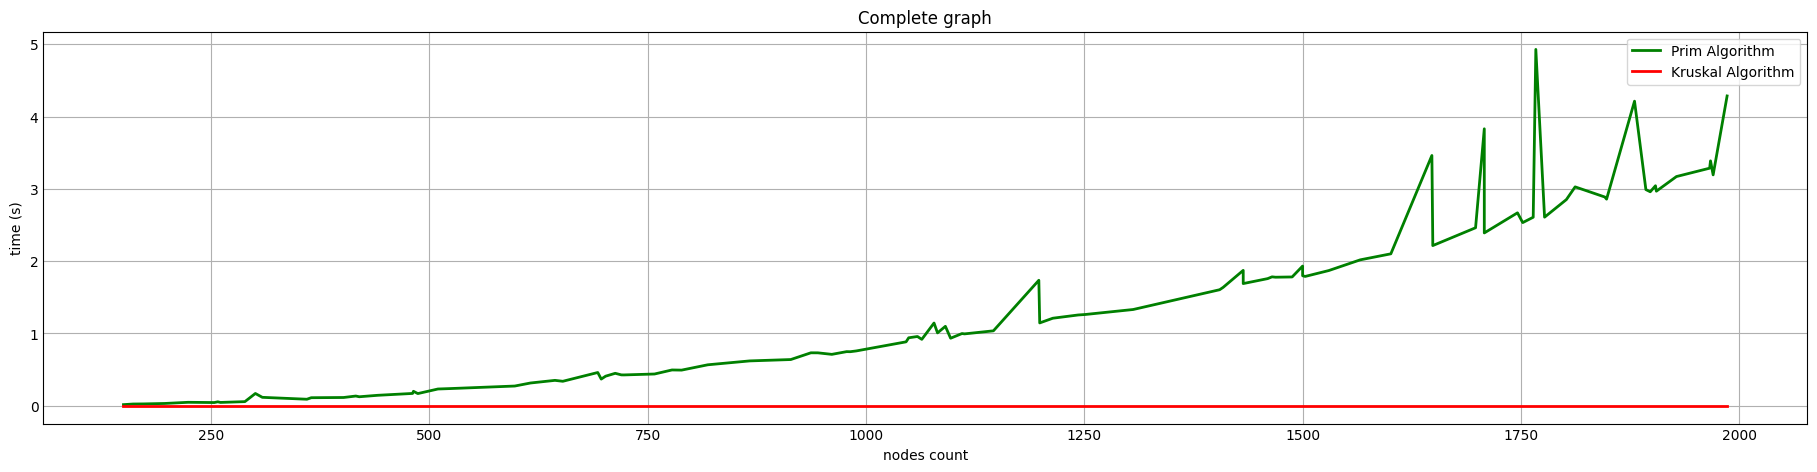

In [23]:
nodes_count, prim_times, kruskal_times = benchmark(100, (100, 2000))
draw_chart(nodes_count, prim_times, kruskal_times, "Complete graph")